In [ ]:
# Project of Scope

The primary objective of this project is to conduct a comprehensive data analysis of migration 
figures to Canada from various countries across the globe. This will involve collecting and 
analyzing data to identify trends and patterns in migration flows. The findings will then be 
visualized using a variety of graphical representations,including area charts, bar charts, and 
histograms. These visualizations will help to clearly illustrate the migration trends and make 
the data more accessible and understandable for stakeholders. By providing detailed insights 
into migration patterns, this project aims to support informed decision-making and policy 
development regarding migration to Canada.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [26]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'

In [27]:
url

'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'

In [28]:
df_can = pd.read_excel(url,sheet_name = 'Canada by Citizenship',skiprows = range(20),skipfooter = 2)

In [29]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [30]:
df_can.drop(['AREA','Coverage','Type','REG'],axis = 1,inplace = True)

In [31]:
df_can.columns

Index([  'OdName', 'AreaName',  'RegName',      'DEV',  'DevName',       1980,
             1981,       1982,       1983,       1984,       1985,       1986,
             1987,       1988,       1989,       1990,       1991,       1992,
             1993,       1994,       1995,       1996,       1997,       1998,
             1999,       2000,       2001,       2002,       2003,       2004,
             2005,       2006,       2007,       2008,       2009,       2010,
             2011,       2012,       2013],
      dtype='object')

In [33]:
df_can.rename(columns = {'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace = True)

In [34]:
df_can.columns

Index([  'Country', 'Continent',    'Region',       'DEV',   'DevName',
              1980,        1981,        1982,        1983,        1984,
              1985,        1986,        1987,        1988,        1989,
              1990,        1991,        1992,        1993,        1994,
              1995,        1996,        1997,        1998,        1999,
              2000,        2001,        2002,        2003,        2004,
              2005,        2006,        2007,        2008,        2009,
              2010,        2011,        2012,        2013],
      dtype='object')

In [ ]:
# Convert columns to string

In [36]:
df_can.columns = list(map(str,df_can.columns))

In [ ]:
# set the Country column as the index

In [37]:
df_can.set_index('Country',inplace = True)

In [38]:
df_can.head()

,Continent,Region,DEV,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,902,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,901,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,902,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,902,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,901,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [ ]:
# create a column for the total number of Migration per country

In [45]:
year = list(map(str,range(1980,2014)))
year

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [46]:
df_can['Total'] = df_can[year].sum(axis = 1)

In [47]:
df_can.columns

Index(['Continent', 'Region', 'DEV', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [ ]:
# sort the data in descending order of the Total cloumn

In [49]:
df_can.sort_values(by = 'Total',ascending = False,inplace = True)

In [ ]:
# list the top 5 countries by Immigration to canada

In [50]:
df_Top5 = df_can.head(5)

In [51]:
df_Top5

,Continent,Region,DEV,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,902,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,902,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,901,Developed regions,22045,24796,20620,10015,10170,9564,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,902,Developing regions,6051,5921,5249,4562,3801,3150,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,902,Developing regions,978,972,1201,900,668,514,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [ ]:
# Transpose the data to make the year column the index

In [53]:
df_Top5 = df_Top5[year].transpose()
df_Top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


In [ ]:
df_Top5 = df_Top5[years].transpose()


In [ ]:
#  Plot an ARea Chart of the top 5 countries.

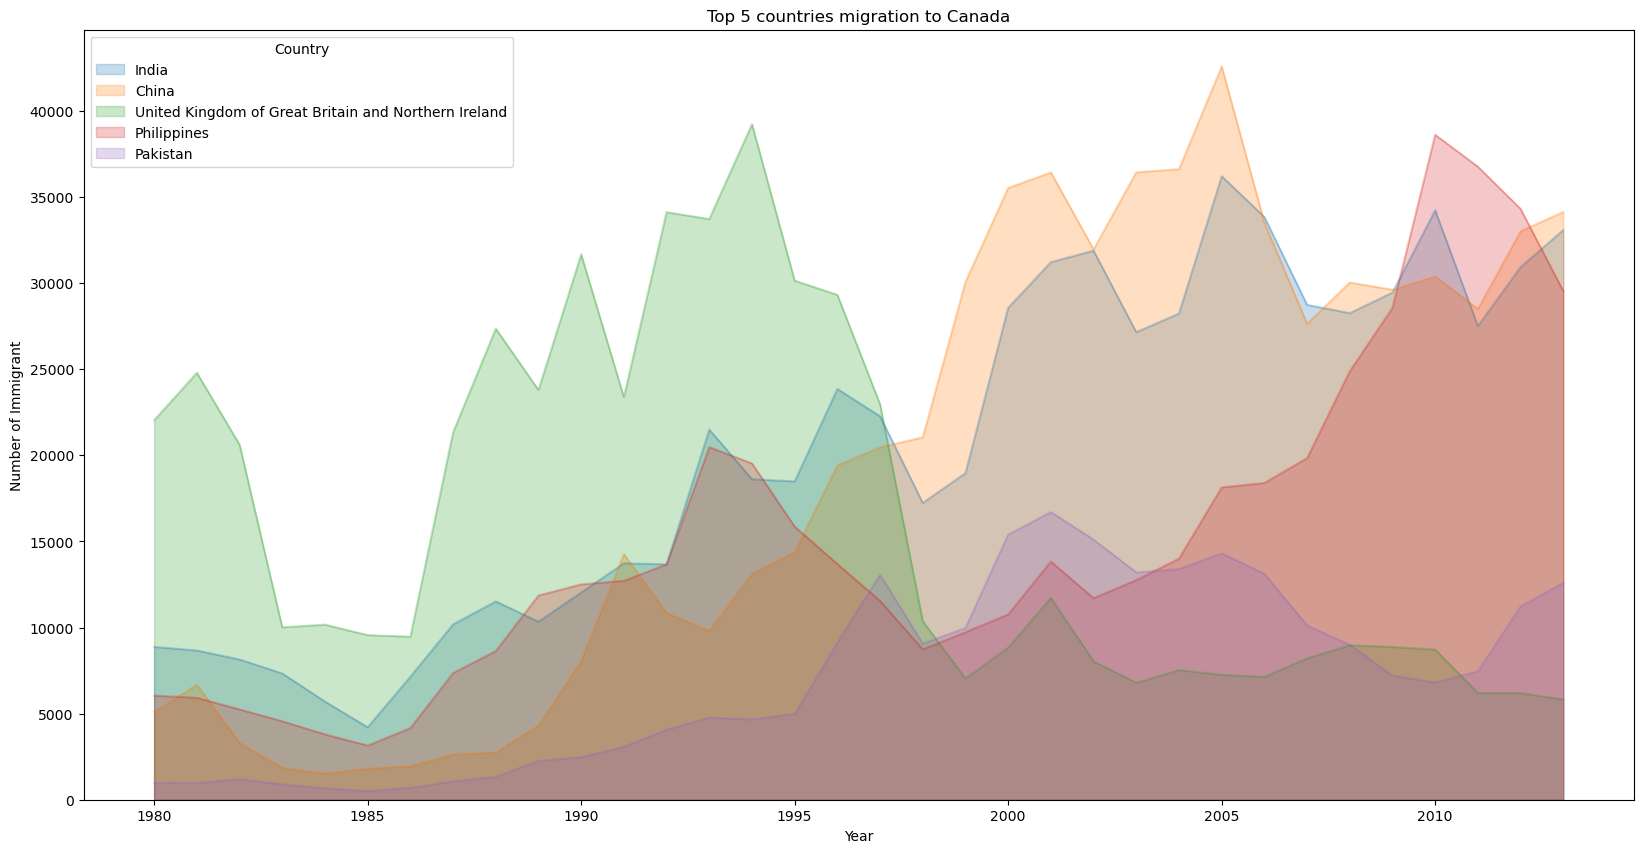

In [54]:
df_Top5.index = df_Top5.index.map(int)
df_Top5.plot(kind = 'area',alpha =0.25, stacked = False,figsize = (20,10))
plt.xlabel('Year')
plt.ylabel('Number of Immigrant')
plt.title('Top 5 countries migration to Canada')
plt.show()

In [ ]:
# Question: Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least 
to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.

In [56]:
df_bottom5 = df_can.tail(5)

In [58]:
df_bottom5 = df_bottom5[year].transpose()
df_bottom5

Country,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,1,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0
1985,0,0,0,0,0
1986,1,0,0,0,0
1987,0,0,0,0,0
1988,0,0,0,0,0
1989,0,0,0,0,0


Text(0.5, 1.0, 'Immigrant trend for bottom 5 Countries')

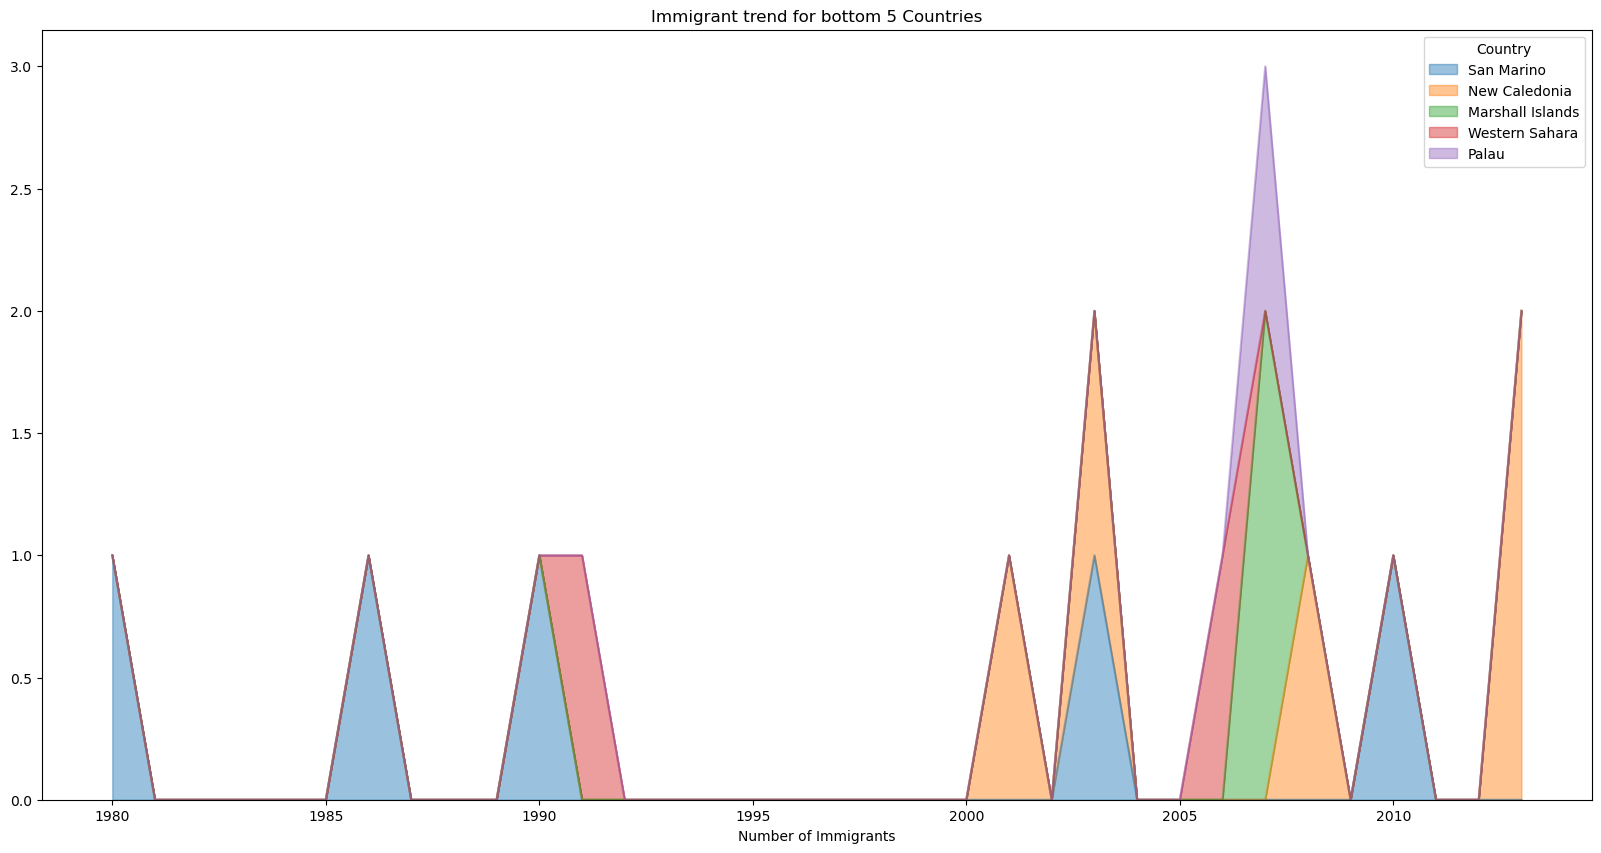

In [59]:
df_bottom5.index = df_bottom5.index.map(int)
df_bottom5.plot(kind ='area',alpha = 0.45,stacked = True,figsize = (20,10))
plt.xlabel('Year')
plt.xlabel('Number of Immigrants')
plt.title('Immigrant trend for bottom 5 Countries')


In [ ]:
# Question: Use the artist layer to create an unstacked area plot of the 10 countries that contributed the 
least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.55.

In [63]:
df_bottom10 = df_can.tail(10)
df_bottom10 = df_bottom10[year].transpose()
df_bottom10

Country,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,0,0,0,0,0,1,0,0,0,0
1981,0,0,0,1,1,0,0,0,0,0
1982,0,0,0,0,0,0,0,0,0,0
1983,1,0,0,0,0,0,0,0,0,0
1984,0,0,0,1,0,0,0,0,0,0
1985,0,0,0,0,0,0,0,0,0,0
1986,0,0,0,0,0,1,0,0,0,0
1987,0,0,0,0,1,0,0,0,0,0
1988,0,0,0,1,0,0,0,0,0,0
1989,2,0,0,0,1,0,0,0,0,0


Text(0, 0.5, 'Number of Immigrants')

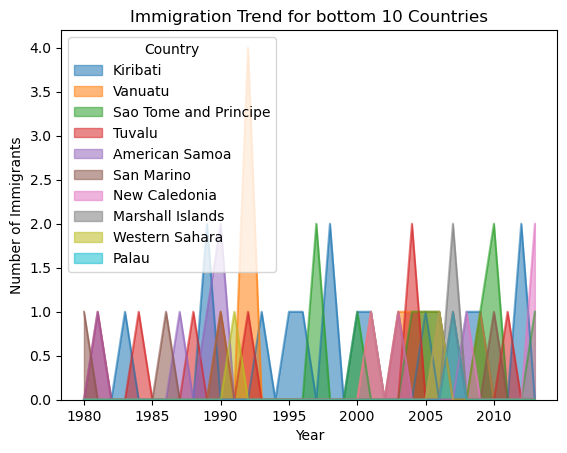

In [64]:
df_bottom10.index = df_bottom10.index.map(int)

ax = df_bottom10.plot(kind = 'area',alpha =0.55,stacked = False)
ax.set_title('Immigration Trend for bottom 10 Countries')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Immigrants')

In [ ]:
# Question: 
What is the frequency distribution of the number (population) of new immigrants from
the various countries to Canada in 2013?

In [65]:
counts,bin_edges = np.histogram(df_can['2013'])

In [67]:
counts

array([178,  11,   1,   2,   0,   0,   0,   0,   1,   2], dtype=int64)

In [68]:
bin_edges

array([    0. ,  3412.9,  6825.8, 10238.7, 13651.6, 17064.5, 20477.4,
       23890.3, 27303.2, 30716.1, 34129. ])

Text(0.5, 1.0, 'Histogram of Immigration from 195 Countries in 2013')

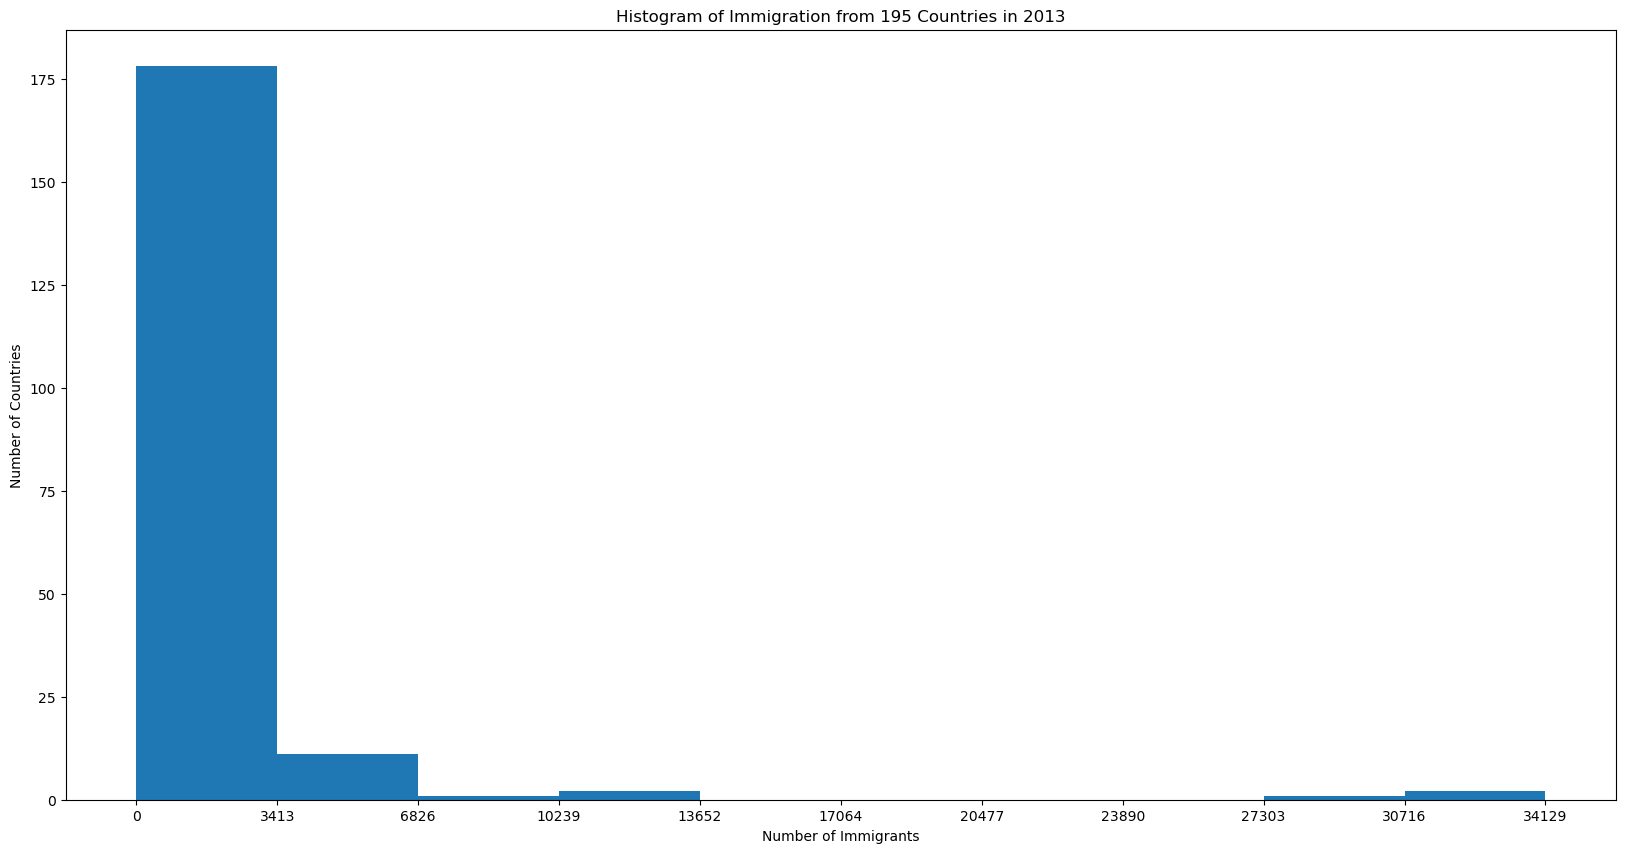

In [69]:
df_can['2013'].plot(kind = 'hist',figsize =(20,10),xticks = bin_edges)
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')
plt.title('Histogram of Immigration from 195 Countries in 2013')

In [ ]:
# Question: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [72]:
df_t = df_can.loc[['Denmark','Norway','Sweden'],year].transpose()

In [73]:
counts,bin_edges = np.histogram(df_t)

In [74]:
counts

array([12, 27, 20, 13, 10, 11,  4,  0,  1,  4], dtype=int64)

In [75]:
bin_edges

array([ 31. ,  58.7,  86.4, 114.1, 141.8, 169.5, 197.2, 224.9, 252.6,
       280.3, 308. ])

Text(0, 0.5, 'Number of Years')

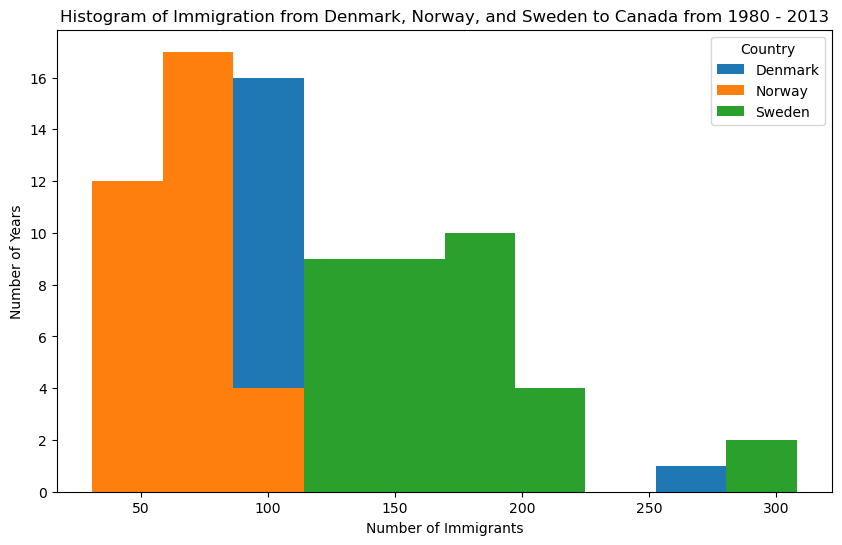

In [76]:
df_t.plot(kind ='hist',figsize =(10,6))
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')

In [ ]:
#Let's make a few modifications to improve the impact and aesthetics of the previous plot:

'increase the bin size to 15 by passing in bins parameter;
'set transparency to 60% by passing in alpha parameter;
'label the x-axis by passing in x-label parameter;
'change the colors of the plots by passing in color parameter.

In [77]:
counts,bin_edges = np.histogram(df_t,15)

In [78]:
counts

array([ 5, 13, 21, 14,  9, 10,  5,  9,  7,  3,  1,  0,  0,  2,  3],
      dtype=int64)

In [79]:
bin_edges

array([ 31.        ,  49.46666667,  67.93333333,  86.4       ,
       104.86666667, 123.33333333, 141.8       , 160.26666667,
       178.73333333, 197.2       , 215.66666667, 234.13333333,
       252.6       , 271.06666667, 289.53333333, 308.        ])

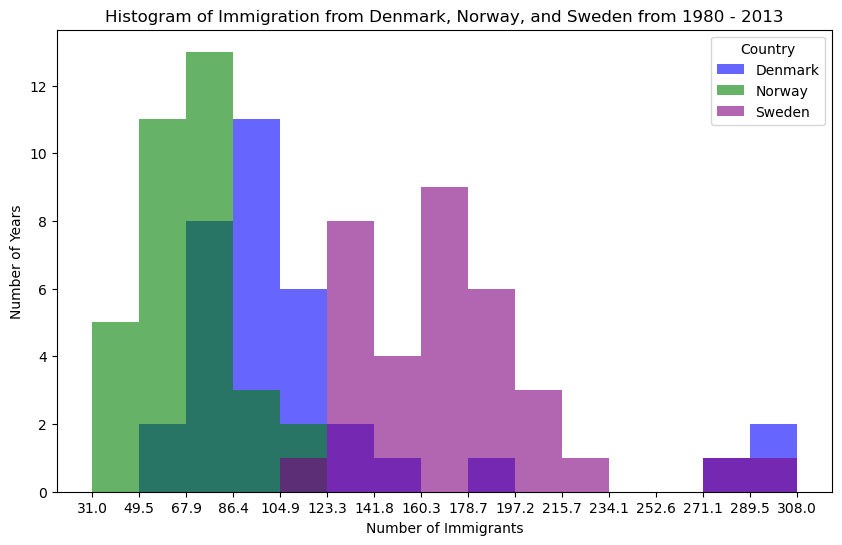

In [80]:
df_t.plot(kind = 'hist',bins = 15, alpha = 0.60, xticks = bin_edges,figsize = (10,6), color =['blue','green','purple'])
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')
plt.show()

In [ ]:
# Question: 
Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria 
for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

In [82]:
df_GAB = df_can.loc[['Greece','Albania','Bulgaria'],year].transpose()

In [83]:
counts, bin_edges = np.histogram(df_GAB,15)

In [84]:
counts

array([37,  9,  4,  6, 13,  9,  5,  5,  3,  3,  2,  3,  1,  1,  1],
      dtype=int64)

In [85]:
bin_edges

array([   0. ,  134.8,  269.6,  404.4,  539.2,  674. ,  808.8,  943.6,
       1078.4, 1213.2, 1348. , 1482.8, 1617.6, 1752.4, 1887.2, 2022. ])

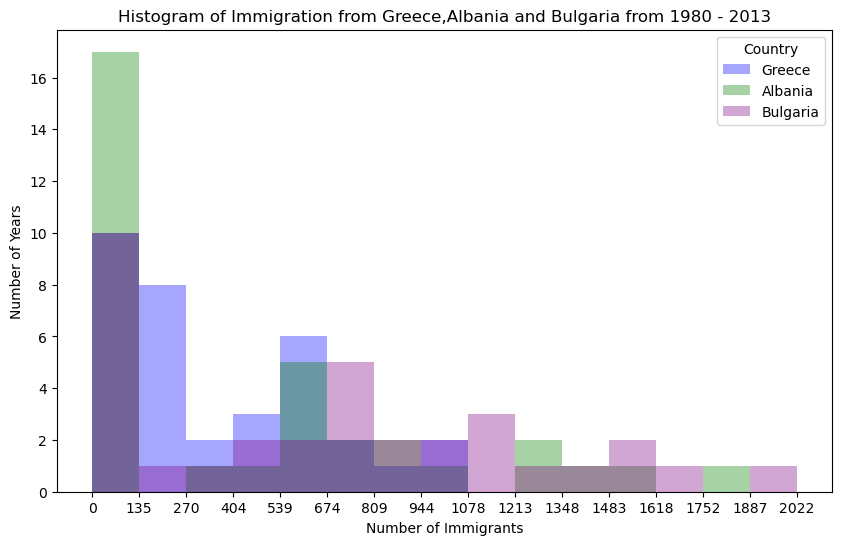

In [86]:
df_GAB.plot(kind = 'hist',bins = 15,alpha = 0.35,figsize = (10,6), xticks = bin_edges,color = ['blue','green','purple'] )

plt.title('Histogram of Immigration from Greece,Albania and Bulgaria from 1980 - 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')

plt.show()

In [ ]:
# Question: Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.


In [87]:
df_Iceland = df_can.loc['Iceland',year]

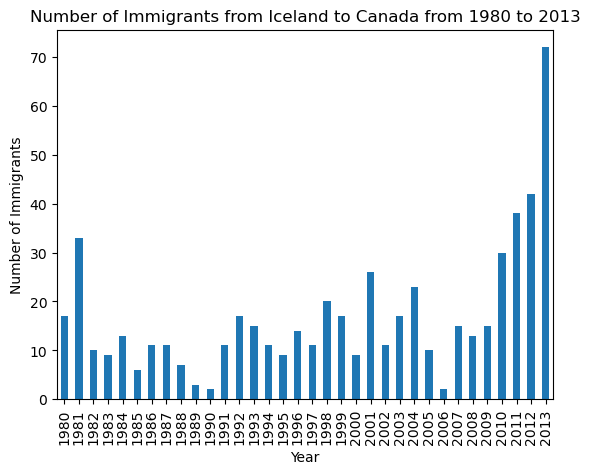

In [88]:
df_Iceland.plot(kind = 'bar')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Number of Immigrants from Iceland to Canada from 1980 to 2013')
plt.show()

In [ ]:
# Question: Using the scripting later and the df_can dataset, create a horizontal bar plot
# showing the total number of immigrants to Canada from the top 15 countries, for the period
# 1980 - 2013. Label each country with the total immigrant count.

In [89]:
df_can.sort_values(by = 'Total',ascending = False,inplace =True)

In [90]:
df_can.columns

Index(['Continent', 'Region', 'DEV', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [91]:
df_Top15 = df_can.head(15)
df_Top15 = df_Top15['Total']
df_Top15

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Name: Total, dtype: int64

In [93]:
df_Top15 = df_Top15.transpose()
df_Top15

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Name: Total, dtype: int64

In [94]:
df_Top15.index 

Index(['India', 'China',
       'United Kingdom of Great Britain and Northern Ireland', 'Philippines',
       'Pakistan', 'United States of America', 'Iran (Islamic Republic of)',
       'Sri Lanka', 'Republic of Korea', 'Poland', 'Lebanon', 'France',
       'Jamaica', 'Viet Nam', 'Romania'],
      dtype='object', name='Country')

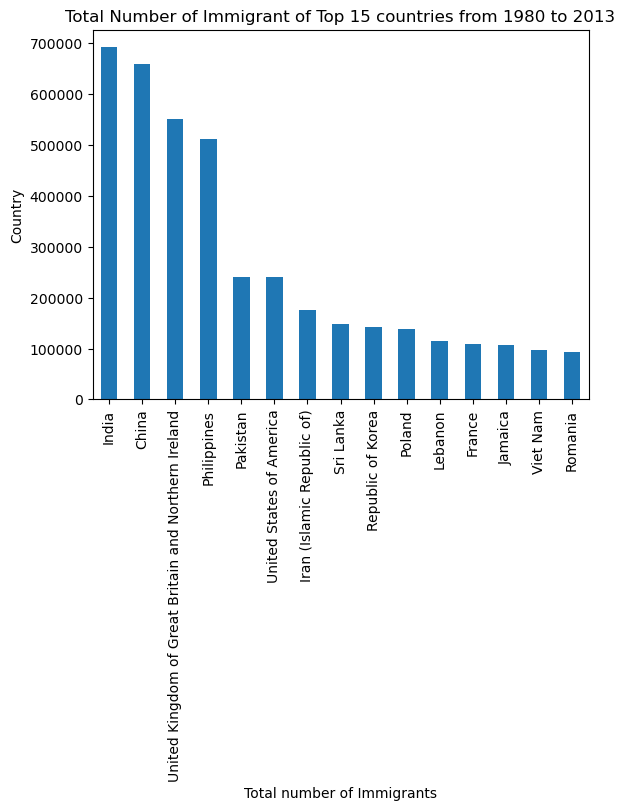

In [95]:
df_Top15.plot(kind = 'bar')
plt.xlabel('Total number of Immigrants')
plt.ylabel('Country')
plt.title('Total Number of Immigrant of Top 15 countries from 1980 to 2013')

plt.show()

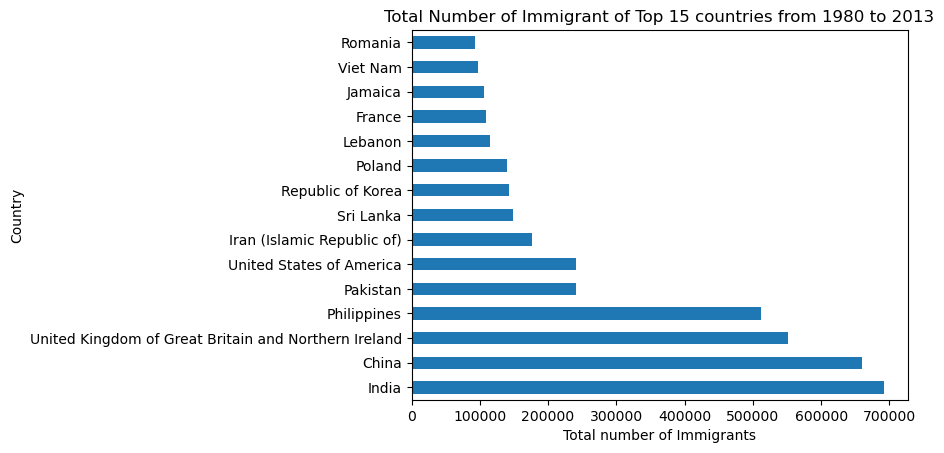

In [96]:
df_Top15.plot(kind = 'barh')
plt.xlabel('Total number of Immigrants')
plt.ylabel('Country')
plt.title('Total Number of Immigrant of Top 15 countries from 1980 to 2013')

plt.show()